<a href="https://colab.research.google.com/github/yashraj02/Deep-Learning-OpenCV/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
 xtrain, ytrain, xtest,ytest = x_train.copy(),y_train.copy(), x_test.copy(), y_test.copy()

In [3]:
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest.reshape(10000, 28, 28, 1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
print(xtrain.max())
print(xtest.max())

255
255


In [0]:
xtrain = xtrain/255
xtest = xtest/255

In [7]:
from keras.utils import to_categorical
print(ytrain.shape)
ytrain = to_categorical(ytrain)
print(ytrain.shape)

(60000,)
(60000, 10)


In [8]:
print(ytest.shape)
ytest = to_categorical(ytest)
print(ytest.shape)

(10000,)
(10000, 10)


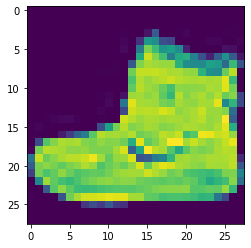

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [12]:
model.fit(xtrain,ytrain,epochs=1,verbose=1)

Epoch 1/1
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1003 - accuracy: 0.9600


In [13]:
model.metrics_names

['loss', 'accuracy']

In [15]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 3s 254us/step


[0.07003206632435321, 0.9716401100158691]

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
ypred = model.predict_classes(xtest)
print(confusion_matrix(y_test,ypred))

[[859   2  32  20   9   2  68   0   8   0]
 [  2 966   1  17   5   0   7   0   2   0]
 [ 13   0 733   7 120   0 125   0   2   0]
 [ 33  14  17 858  41   0  36   0   1   0]
 [  1   1  60  34 696   0 207   0   1   0]
 [  0   0   0   3   0 945   0  30   0  22]
 [215   2  76  14  94   0 585   0  14   0]
 [  0   0   0   0   0  19   0 938   0  43]
 [  0   1   5   5   8   2  15   3 960   1]
 [  0   0   0   0   0   2   0  34   1 963]]


In [20]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.79      0.73      0.76      1000
           3       0.90      0.86      0.88      1000
           4       0.72      0.70      0.71      1000
           5       0.97      0.94      0.96      1000
           6       0.56      0.58      0.57      1000
           7       0.93      0.94      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

